In [ ]:
# from data_downloader import download_dataset
# # URL of the SUSY dataset
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'

# # Directory to save the dataset
# directory = 'data'

# # Path to save the downloaded file
# compressed_file_name = 'SUSY.csv.gz'
# uncompressed_file_name = 'SUSY.csv'

# download_dataset(directory, url, compressed_file_name, uncompressed_file_name)

In [4]:
from data_datasets import higgs,susy,cod_rna
N = 10000
data = "susy"
# data = "higgs"
# data = "cod_rna"
####################

if data == "higgs":
    X_train, X_test, y_train, y_test = higgs(N)
elif data == "susy":
    X_train, X_test, y_train, y_test = susy(N)
elif data == "cod_rna":
    X_train, X_test, y_train, y_test = cod_rna(N)

print("\nDataset:", data)
print("--------\nShape train data:", X_train.shape)
print("Shape test data:", X_test.shape)


Dataset: susy
--------
Shape train data: (10000, 18)
Shape test data: (10000, 18)


## KRR witout Preconditioning

In [11]:
from pkrr import PKRR
from math import *
gamma = sqrt(1./6)
mu = N*1e-7

model1 = PKRR(mu=mu, gamma=gamma, rank=50)

model1.fit(X_train=X_train, y_train=y_train, maxiter=300)
print(model1.report)
y_predict_1 = model1.predict(X_test)
print(
    f"Correct: {sum(y_test==y_predict_1 )} , Incorrect: {sum(y_test!=y_predict_1)}")

Training is done in 145 iteration with CG-method. Precondition: without precondition
Correct: 7206 , Incorrect: 2794


## KRR with Nystrom as Preconditioner

In [12]:
from pkrr import PKRR
model2 = PKRR(mu=mu, rank=50, gamma=gamma, prec="nystrom")

model2.fit(X_train=X_train, y_train=y_train, maxiter=300)
print(model2.report)
y_predict_2 = model2.predict(X_test)
print(
    f"Correct: {sum(y_test==y_predict_2 )} , Incorrect: {sum(y_test!=y_predict_2)}")

Training is done in 117 iteration with CG-method. Precondition: nystrom
Correct: 7205 , Incorrect: 2795


# KRR with RPCholesky as Preconditioner

In [15]:
from pkrr import PKRR
model3 = PKRR(mu=mu, rank=50, gamma=gamma, prec="rpc")

model3.fit(X_train=X_train, y_train=y_train, maxiter=300)
print(model3.report)
y_predict_3 = model3.predict(X_test)
print(
    f"Correct: {sum(y_test==y_predict_3 )} , Incorrect: {sum(y_test!=y_predict_3)}")

Training is done in 146 iteration with CG-method. Precondition: rpc
Correct: 7204 , Incorrect: 2796


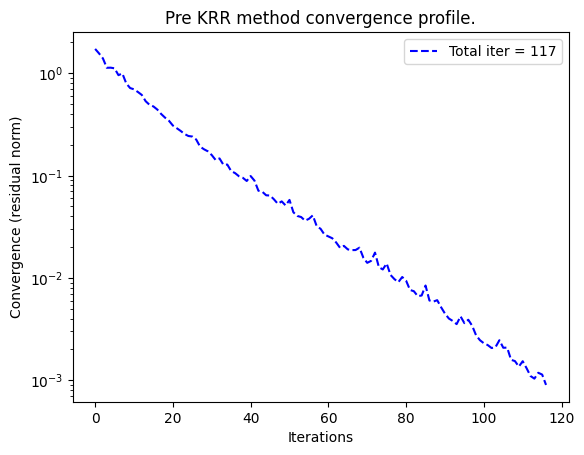

In [16]:
# """Show plot with convergence profile - normalised residual vector vs iteration."""
import matplotlib.pyplot as plt
plt.title('Pre KRR method convergence profile.')
plt.ylabel('Convergence (residual norm)')
plt.xlabel('Iterations')

m_res = model2.residuals
plt.semilogy(range(len(m_res)), m_res, 'b--')
plt.legend(['Total iter = ' + str(len(m_res))])
# plt.show()

In [17]:
model1.residuals

array([2.15826065e+00, 1.69011576e+00, 1.49136423e+00, 1.55292114e+00,
       1.24606871e+00, 1.24231996e+00, 1.30580334e+00, 1.00432481e+00,
       1.06431198e+00, 9.54609474e-01, 9.39673990e-01, 8.45629931e-01,
       7.67783835e-01, 7.53549492e-01, 7.06793774e-01, 6.05667476e-01,
       5.22624304e-01, 5.05607663e-01, 5.13424021e-01, 4.64913115e-01,
       4.64350203e-01, 4.04100639e-01, 3.62654417e-01, 4.77209022e-01,
       3.93579033e-01, 3.19921853e-01, 3.10922736e-01, 2.99644160e-01,
       2.66129194e-01, 2.62884272e-01, 2.37558802e-01, 2.48776736e-01,
       2.15448301e-01, 2.05517474e-01, 2.71670675e-01, 1.87399194e-01,
       1.71186916e-01, 1.60519972e-01, 1.51131060e-01, 1.50457517e-01,
       1.86443525e-01, 1.28911862e-01, 1.25922138e-01, 1.08893248e-01,
       1.67234622e-01, 1.17206513e-01, 9.84807986e-02, 9.53420319e-02,
       9.23635483e-02, 1.04580827e-01, 9.61109318e-02, 8.08859665e-02,
       7.17844400e-02, 6.66095689e-02, 7.83797792e-02, 7.26589588e-02,
      